In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.modeling import models, fitting
from iminuit import Minuit   
from scipy import stats
from scipy.stats import linregress
import sys
import pandas as pd

sys.path.append(r'C:\Users\anna_\OneDrive\Υπολογιστής\MSc\AppStats\AppStat2023\External_Functions')
from ExternalFunctions import Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax

C:\Users\anna_\AppData\Local\Temp\ipykernel_48956\1202228490.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  file = pd.read_csv(r"C:\Users\anna_\Downloads\readoh.txt", sep='  ')


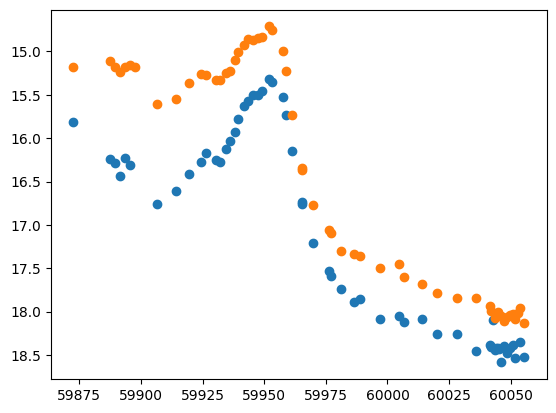

In [2]:
file = pd.read_csv(r"C:\Users\anna_\Downloads\readoh.txt", sep='  ')

g = file[file['FLT'] == 'gp']
i = file[file['FLT'] == 'rp']
gmag = g['MAG']
gday = g['MJD']
imag = i['MAG']
iday = i['MJD']

plt.gca().invert_yaxis()

plt.scatter(gday, gmag)
plt.scatter(iday, imag)

In [3]:
file = pd.read_csv(r"C:\Users\anna_\Downloads\2022bdu_data.snana.txt", sep='  ')

g_ZTF = file[file['FLT'] == 'g-ZTF']
r_ZTF = file[file['FLT'] == 'r-ZTF']
orange_ATLAS = file[file['FLT'] == 'orange-ATLAS']
cyan_ATLAS = file[file['FLT'] == 'cyan-ATLAS']

C:\Users\anna_\AppData\Local\Temp\ipykernel_48956\1228897495.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  file = pd.read_csv(r"C:\Users\anna_\Downloads\2022bdu_data.snana.txt", sep='  ')


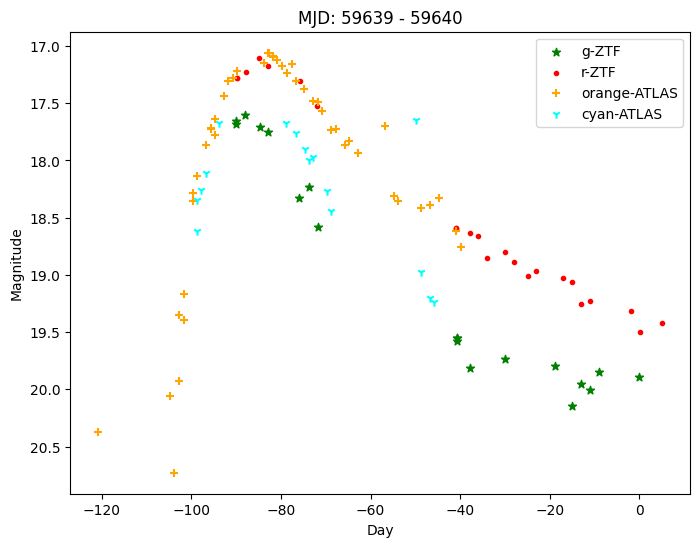

In [4]:
gday = g_ZTF['MJD']-np.max(g_ZTF['MJD'])
gmag = g_ZTF['MAG']

rday = r_ZTF['MJD']-np.max(g_ZTF['MJD'])
rmag = r_ZTF['MAG']

orday = orange_ATLAS['MJD']-np.max(g_ZTF['MJD'])
ormag = orange_ATLAS['MAG']

cyday = cyan_ATLAS['MJD']-np.max(g_ZTF['MJD'])
cymag = cyan_ATLAS['MAG']

plt.figure(figsize=(8,6))
plt.scatter(gday, gmag, c='green', label='g-ZTF', marker='*')
plt.scatter(rday, rmag, c='red', label='r-ZTF', marker='.')
plt.scatter(orday, ormag, c='orange', label='orange-ATLAS', marker='+')
plt.scatter(cyday, cymag, c='cyan', label='cyan-ATLAS', marker='1')

plt.gca().invert_yaxis()

# xmin1 = 59635-np.max(g_ZTF['MJD'])
# xmax1 = 59637-np.max(g_ZTF['MJD'])
# plt.axvline(xmin1, linestyle='--', c='red', label='Δt ~ 1 day')
# plt.axvline(xmax1, linestyle='--', c='red')

xmin2 = 59639-np.max(g_ZTF['MJD'])
xmax2 = 59641-np.max(g_ZTF['MJD'])
# plt.axvline(xmin2, linestyle='--', c='blue', label='Δt ~ 1 day')
# plt.axvline(xmax2, linestyle='--', c='blue')
# plt.xlim(-77, -67)
plt.xlabel('Day')
plt.ylabel('Magnitude')
plt.title('MJD: 59639 - 59640')
plt.legend()

# plt.savefig(r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectra_bdu.pdf", dpi=200)

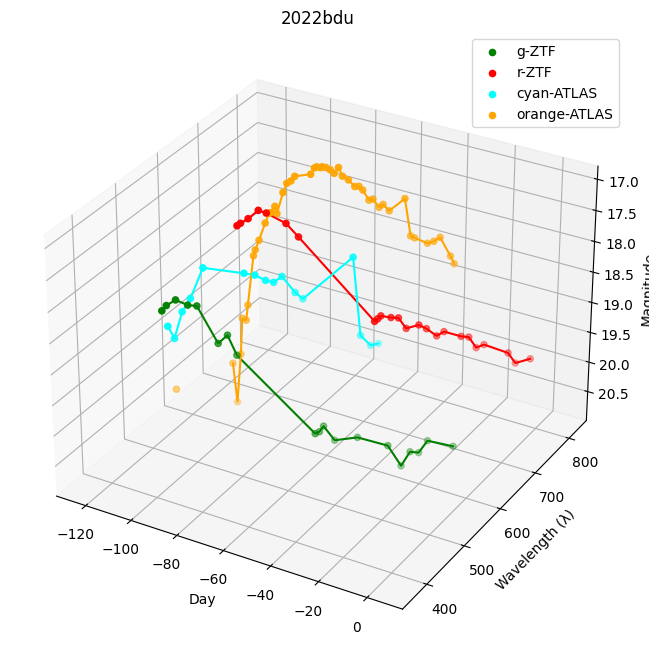

<Figure size 640x480 with 0 Axes>

In [5]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

x4 = gday
z4 = gmag
y4 = np.linspace(370, 560, num=19)

x5 = rday
z5 = rmag
y5 = np.linspace(550, 740, num=24)

x6 = cyday
z6 = cymag
y6 = np.linspace(415, 650, num=17)

x7 = orday
z7 = ormag
y7 = np.linspace(560, 820, num=58)


ax.scatter3D(x4, y4, z4, c='green', label='g-ZTF')
ax.scatter3D(x5, y5, z5, c='red', label='r-ZTF')
ax.scatter3D(x6, y6, z6, c='cyan', label='cyan-ATLAS')
ax.scatter3D(x7, y7, z7, c='orange', label='orange-ATLAS')

ax.plot3D(x4, y4, z4, c='green')
ax.plot3D(x5, y5, z5, c='red')
ax.plot3D(x6, y6, z6, c='cyan')
ax.plot3D(x7, y7, z7, c='orange')

ax.invert_zaxis()
ax.set_title('2022bdu')
ax.set_xlabel('Day')
ax.set_ylabel('Wavelength (λ)')
ax.set_zlabel('Magnitude')
ax.legend()

plt.show()

# plt.savefig(r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\spectra_bdu3d.pdf", dpi=200)

In [6]:
g1_day = 59636.225
g2_day = 59640.350
g1_wav = 480

r1_day = 59636.350
r2_day = 59640.266
r1_wav = 630

cy1_day = 59635.482
cy2_day = 59639.448
cy1_wav = 530

or1_day = 59635.528
or2_day = 59639.420
or1_wav = 680

x = np.array([g1_wav, r1_wav, cy1_wav, or1_wav])
y1 = np.array([g1_day, r1_day, cy1_day, or1_day])
y2 = np.array([g2_day, r2_day, cy2_day, or2_day])



Text(0.5, 1.0, 'MJD: 59635 - 59636')

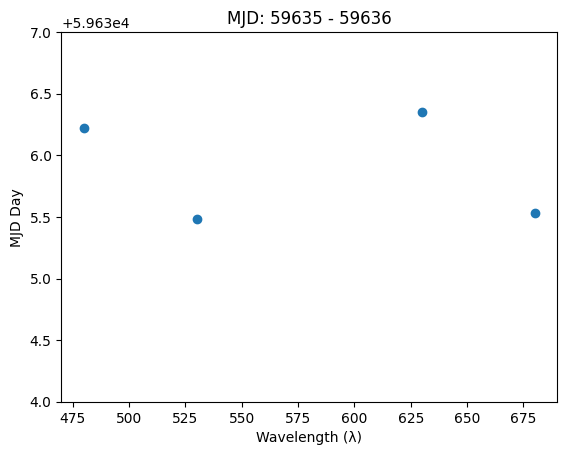

In [7]:
plt.scatter(x,y1)
plt.xlabel('Wavelength (λ)')
plt.ylabel('MJD Day')

plt.ylim(59634,59637)
plt.title('MJD: 59635 - 59636')

Text(0.5, 1.0, 'MJD: 59639 - 59641')

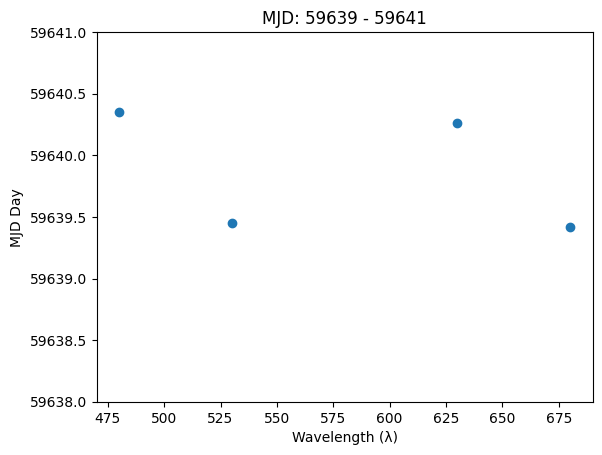

In [8]:
plt.scatter(x,y2)
plt.xlabel('Wavelength (λ)')
plt.ylabel('MJD Day')

plt.ylim(59638,59641)
plt.title('MJD: 59639 - 59641')

Text(0.5, 1.0, 'MJD: 59635 - 59636')

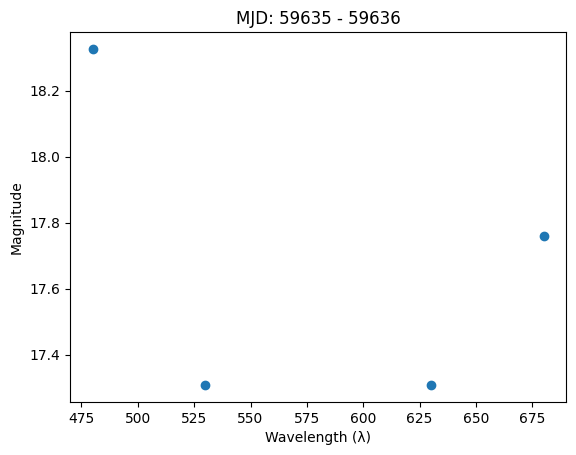

In [9]:
gm1 = g_ZTF.loc[g_ZTF['MJD'] == g1_day, 'MAG'].values
rm1 = r_ZTF.loc[r_ZTF['MJD'] == r1_day, 'MAG'].values
orm1 = orange_ATLAS.loc[orange_ATLAS['MJD'] == or1_day, 'MAG'].values
cym1 = cyan_ATLAS.loc[cyan_ATLAS['MJD'] == cy1_day, 'MAG'].values

magni1 = np.array([gm1, rm1, orm1, cym1])
plt.scatter(x, magni1)
plt.xlabel('Wavelength (λ)')
plt.ylabel('Magnitude')
plt.title('MJD: 59635 - 59636')

Text(0.5, 1.0, 'MJD: 59639 - 59640')

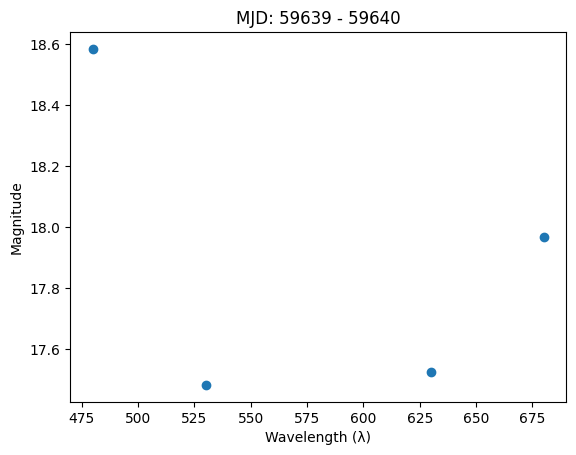

In [10]:
gm2 = g_ZTF.loc[g_ZTF['MJD'] == g2_day, 'MAG'].values
rm2 = r_ZTF.loc[r_ZTF['MJD'] == r2_day, 'MAG'].values
orm2 = orange_ATLAS.loc[orange_ATLAS['MJD'] == or2_day, 'MAG'].values
cym2 = cyan_ATLAS.loc[cyan_ATLAS['MJD'] == cy2_day, 'MAG'].values

magni2 = np.array([gm2, rm2, orm2, cym2])

plt.scatter(x, magni2)
plt.xlabel('Wavelength (λ)')
plt.ylabel('Magnitude')
plt.title('MJD: 59639 - 59640')

Text(0.5, 1.0, 'MJD: 59635 - 59636')

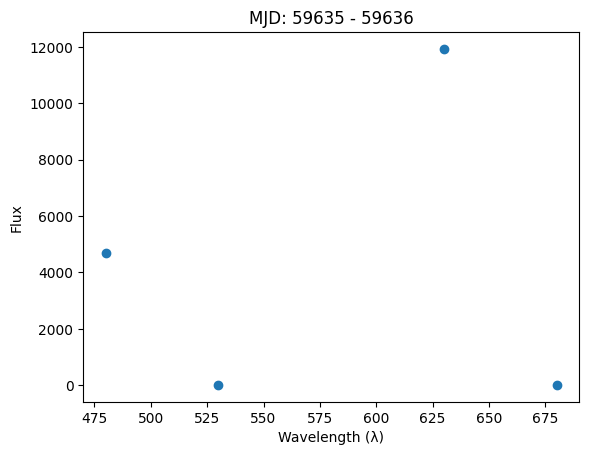

In [11]:
gf1 = g_ZTF.loc[g_ZTF['MJD'] == g1_day, 'FLUXCAL'].values
rf1 = r_ZTF.loc[r_ZTF['MJD'] == r1_day, 'FLUXCAL'].values
orf1 = orange_ATLAS.loc[orange_ATLAS['MJD'] == or1_day, 'FLUXCAL'].values
cyf1 = cyan_ATLAS.loc[cyan_ATLAS['MJD'] == cy1_day, 'FLUXCAL'].values

flux1 = np.array([gf1, rf1, orf1, cyf1])
plt.scatter(x, flux1)
plt.xlabel('Wavelength (λ)')
plt.ylabel('Flux')
plt.title('MJD: 59635 - 59636')

Text(0.5, 1.0, 'MJD: 59639 - 59640')

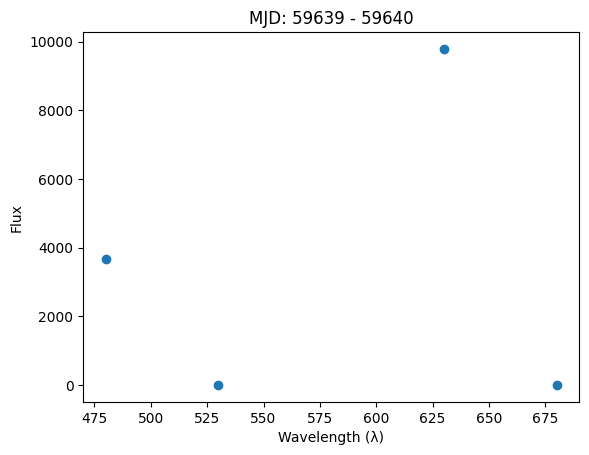

In [12]:
gf2 = g_ZTF.loc[g_ZTF['MJD'] == g2_day, 'FLUXCAL'].values
rf2 = r_ZTF.loc[r_ZTF['MJD'] == r2_day, 'FLUXCAL'].values
orf2 = orange_ATLAS.loc[orange_ATLAS['MJD'] == or2_day, 'FLUXCAL'].values
cyf2 = cyan_ATLAS.loc[cyan_ATLAS['MJD'] == cy2_day, 'FLUXCAL'].values

flux2 = np.array([gf2, rf2, orf2, cyf2])

plt.scatter(x, flux2)
plt.xlabel('Wavelength (λ)')
plt.ylabel('Flux')
plt.title('MJD: 59639 - 59640')

In [27]:
file = pd.read_csv(r"C:\Users\anna_\Downloads\2023cpt_data.snana.txt", sep='  ')

g_ZTF = file[file['FLT'] == 'g-ZTF']
r_ZTF = file[file['FLT'] == 'r-ZTF']
orange_ATLAS = file[file['FLT'] == 'orange-ATLAS']
cyan_ATLAS = file[file['FLT'] == 'cyan-ATLAS']
u = file[file['FLT'] == 'U']
b = file[file['FLT'] == 'B']
v = file[file['FLT'] == 'V']
w = file[file['FLT'] == 'w']
ip = file[file['FLT'] == 'ip']
up = file[file['FLT'] == 'up']
gp = file[file['FLT'] == 'gp']
rp = file[file['FLT'] == 'rp']
w1 = file[file['FLT'] == 'UVW1']
m2 = file[file['FLT'] == 'UVM2']
w2 = file[file['FLT'] == 'UVW2']


C:\Users\anna_\AppData\Local\Temp\ipykernel_48956\3668356301.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  file = pd.read_csv(r"C:\Users\anna_\Downloads\2023cpt_data.snana.txt", sep='  ')


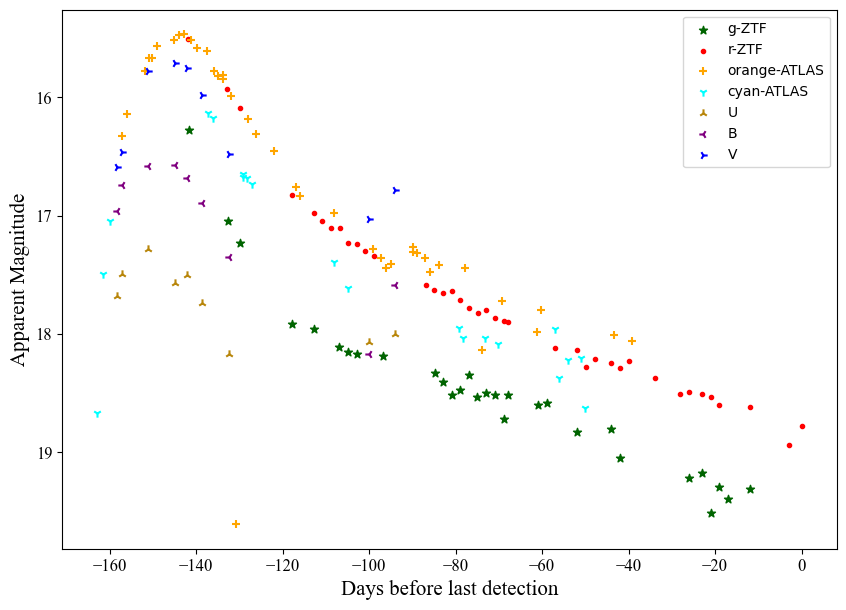

In [39]:
gday = g_ZTF['MJD']-np.max(r_ZTF['MJD'])
gmag = g_ZTF['MAG']

rday = r_ZTF['MJD']-np.max(r_ZTF['MJD'])
rmag = r_ZTF['MAG']

orday = orange_ATLAS['MJD']-np.max(r_ZTF['MJD'])
ormag = orange_ATLAS['MAG']

cyday = cyan_ATLAS['MJD']-np.max(r_ZTF['MJD'])
cymag = cyan_ATLAS['MAG']

uday = u['MJD']-np.max(r_ZTF['MJD'])
umag = u['MAG']

bday = b['MJD']-np.max(r_ZTF['MJD'])
bmag = b['MAG']

vday = v['MJD']-np.max(r_ZTF['MJD'])
vmag = v['MAG']

wday = w['MJD']-np.max(r_ZTF['MJD'])
wmag = w['MAG']

w1day = w1['MJD']-np.max(r_ZTF['MJD'])
w1mag = w1['MAG']

m2day = m2['MJD']-np.max(r_ZTF['MJD'])
m2mag = m2['MAG']

w2day = w2['MJD']-np.max(r_ZTF['MJD'])
w2mag = w2['MAG']

upday = up['MJD']-np.max(r_ZTF['MJD'])
upmag = up['MAG']

gpday = gp['MJD']-np.max(r_ZTF['MJD'])
gpmag = gp['MAG']

rpday = rp['MJD']-np.max(r_ZTF['MJD'])
rpmag = rp['MAG']

ipday = ip['MJD']-np.max(r_ZTF['MJD'])
ipmag = ip['MAG']

plt.figure(figsize=(10,7))
plt.scatter(gday, gmag, c='darkgreen', label='g-ZTF', marker='*')
plt.scatter(rday, rmag, c='red', label='r-ZTF', marker='.')
plt.scatter(orday, ormag, c='orange', label='orange-ATLAS', marker='+')
plt.scatter(cyday, cymag, c='cyan', label='cyan-ATLAS', marker='1')
plt.scatter(uday, umag, c='darkgoldenrod', label='U', marker='2')
plt.scatter(bday, bmag, c='purple', label='B', marker='3')
plt.scatter(vday, vmag, c='blue', label='V', marker='4')
# plt.scatter(wday, wmag, c='magenta', label='w', marker='+')
# plt.scatter(w1day, w1mag, c='blue', label='UVW1', marker='.')
# plt.scatter(m2day, m2mag, c='green', label='UVM2', marker='^')
# plt.scatter(w2day, w2mag, c='lightblue', label='UVW2', marker='v')
# plt.scatter(upday, upmag, c='gray', label='up', marker='*')
# plt.scatter(gpday, gpmag, c='yellow', label='gp', marker='.')
# plt.scatter(rpday, rpmag, c='pink', label='rp', marker='+')
# plt.scatter(ipday, ipmag, c='green', label='ip', marker='1')


plt.gca().invert_yaxis()

plt.xlabel('Days before last detection', fontdict={'fontsize': 15, 'fontname': 'Times New Roman'})
plt.ylabel('Apparent Magnitude', fontdict={'fontsize': 15, 'fontname': 'Times New Roman'})
# plt.title('2023cpt photometry')
plt.xticks(fontsize=12, fontname='Times New Roman')
plt.yticks(fontsize=12, fontname='Times New Roman')
plt.legend()

# plt.savefig(r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\photo_cpt.pdf", dpi=200)

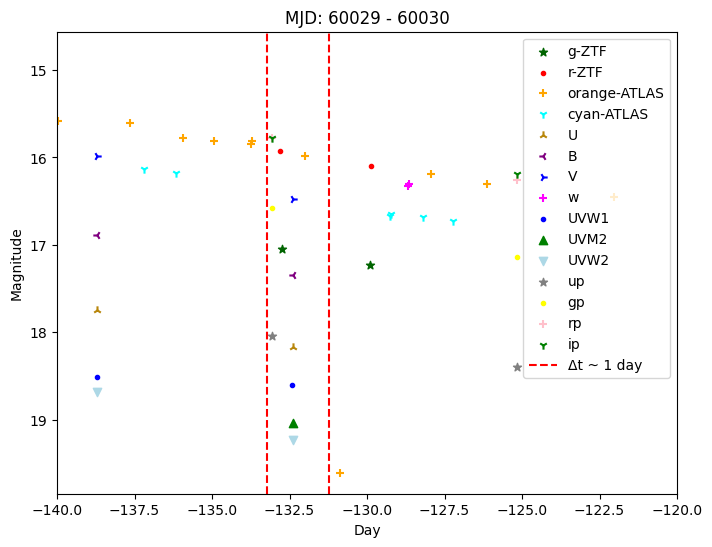

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(gday, gmag, c='darkgreen', label='g-ZTF', marker='*')
plt.scatter(rday, rmag, c='red', label='r-ZTF', marker='.')
plt.scatter(orday, ormag, c='orange', label='orange-ATLAS', marker='+')
plt.scatter(cyday, cymag, c='cyan', label='cyan-ATLAS', marker='1')
plt.scatter(uday, umag, c='darkgoldenrod', label='U', marker='2')
plt.scatter(bday, bmag, c='purple', label='B', marker='3')
plt.scatter(vday, vmag, c='blue', label='V', marker='4')
plt.scatter(wday, wmag, c='magenta', label='w', marker='+')
plt.scatter(w1day, w1mag, c='blue', label='UVW1', marker='.')
plt.scatter(m2day, m2mag, c='green', label='UVM2', marker='^')
plt.scatter(w2day, w2mag, c='lightblue', label='UVW2', marker='v')
plt.scatter(upday, upmag, c='gray', label='up', marker='*')
plt.scatter(gpday, gpmag, c='yellow', label='gp', marker='.')
plt.scatter(rpday, rpmag, c='pink', label='rp', marker='+')
plt.scatter(ipday, ipmag, c='green', label='ip', marker='1')


plt.gca().invert_yaxis()

xmin1 = 60029-np.max(r_ZTF['MJD'])
xmax1 = 60031-np.max(r_ZTF['MJD'])
plt.axvline(xmin1, linestyle='--', c='red', label='Δt ~ 1 day')
plt.axvline(xmax1, linestyle='--', c='red')

plt.xlim(-140,-120)

plt.xlabel('Day')
plt.ylabel('Magnitude')
plt.title('MJD: 60029 - 60030')
plt.legend()

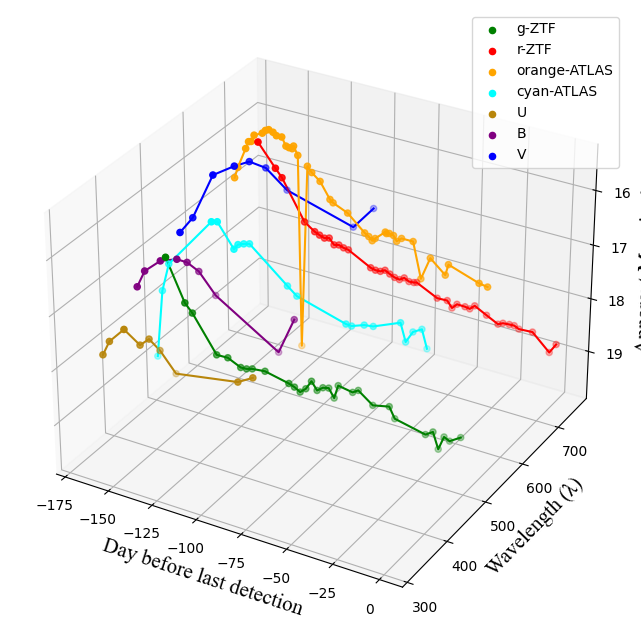

In [46]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

x1 = uday
z1 = umag
y1 = np.linspace(320,400, num=9)

x2 = bday
z2 = bmag
y2 = np.linspace(400,500, num=9)

x3 = vday
z3 = vmag
y3 = np.linspace(500,700, num=9)

x4 = gday
z4 = gmag
y4 = np.linspace(400, 550, num=30)

x5 = rday
z5 = rmag
y5 = np.linspace(620, 750, num=39)

x6 = cyday
z6 = cymag
y6 = np.linspace(440, 640, num=22)

x7 = orday
z7 = ormag
y7 = np.linspace(620, 750, num=43)

x8 = upday
z8 = upmag
y8 = np.linspace(325, 382, num=21)

x9 = ipday
z9 = ipmag
y9 = np.linspace(689, 819, num=20)

x10 = gpday
z10 = gpmag
y10 = np.linspace(402, 552, num=22)

x11 = rpday
z11 = rpmag
y11 = np.linspace(551, 690, num=22)

# plt.figure(figsize=(10,7))

ax.scatter3D(x4, y4, z4, c='green', label='g-ZTF')
ax.scatter3D(x5, y5, z5, c='red', label='r-ZTF')
ax.scatter3D(x7, y7, z7, c='orange', label='orange-ATLAS')
ax.scatter3D(x6, y6, z6, c='cyan', label='cyan-ATLAS')
ax.scatter3D(x1, y1, z1, c='darkgoldenrod', label='U')
ax.scatter3D(x2, y2, z2, c='purple', label='B')
ax.scatter3D(x3, y3, z3, c='blue', label='V')
# ax.scatter3D(x8, y8, z8, c='lightblue', label='up')
# ax.scatter3D(x9, y9, z9, c='magenta', label='ip')
# ax.scatter3D(x10, y10, z10, c='limegreen', label='gp')
# ax.scatter3D(x11, y11, z11, c='saddlebrown', label='rp')

ax.plot3D(x1, y1, z1, c='darkgoldenrod')
ax.plot3D(x2, y2, z2, c='purple')
ax.plot3D(x3, y3, z3, c='blue')
ax.plot3D(x4, y4, z4, c='green')
ax.plot3D(x5, y5, z5, c='red')
ax.plot3D(x6, y6, z6, c='cyan')
ax.plot3D(x7, y7, z7, c='orange')
# ax.plot3D(x8, y8, z8, c='lightblue')
# ax.plot3D(x9, y9, z9, c='magenta')
# ax.plot3D(x10, y10, z10, c='limegreen')
# ax.plot3D(x11, y11, z11, c='saddlebrown')

ax.invert_zaxis()
# ax.set_title('2023cpt')
ax.set_xlabel('Day before last detection', fontdict={'fontsize': 15, 'fontname': 'Times New Roman'})
ax.set_ylabel('Wavelength (λ)', fontdict={'fontsize': 15, 'fontname': 'Times New Roman'})
ax.set_zlabel('Apparent Magnitude', fontdict={'fontsize': 15, 'fontname': 'Times New Roman'})
ax.legend()

# plt.show()
plt.savefig(r"C:\Users\anna_\OneDrive\Υπολογιστής\MSc\Project\photo_cpt3d.pdf", dpi=200)


In [17]:
w1m = w1.loc[w1['MJD'] == 60029.827, 'MAG'].values
w1d = w1.loc[w1['MJD'] == 60029.827, 'MJD'].values
w1f = w1.loc[w1['MJD'] == 60029.827, 'FLUXCAL'].values
w1w = 3400

um = u.loc[u['MJD'] == 60029.830, 'MAG'].values
ud = u.loc[u['MJD'] == 60029.830, 'MJD'].values
uf = u.loc[u['MJD'] == 60029.830, 'FLUXCAL'].values
uw = 350

bm = b.loc[b['MJD'] == 60029.831, 'MAG'].values
bd = b.loc[b['MJD'] == 60029.831, 'MJD'].values
bf = b.loc[b['MJD'] == 60029.831, 'FLUXCAL'].values
bw = 436

w2m = w2.loc[w2['MJD'] == 60029.832, 'MAG'].values
w2d = w2.loc[w2['MJD'] == 60029.832, 'MJD'].values
w2f = w2.loc[w2['MJD'] == 60029.832, 'FLUXCAL'].values
w2w = 4600

vm = v.loc[v['MJD'] == 60029.837, 'MAG'].values
vd = v.loc[v['MJD'] == 60029.837, 'MJD'].values
vf = v.loc[v['MJD'] == 60029.837, 'FLUXCAL'].values
vw = 545

m2m = m2.loc[m2['MJD'] == 60029.838, 'MAG'].values
m2d = m2.loc[m2['MJD'] == 60029.838, 'MJD'].values
m2d = m2.loc[m2['MJD'] == 60029.838, 'FLUXCAL'].values
m2w = 4500

upm = up.loc[up['MJD'] == 60029.165, 'MAG'].values
upd = up.loc[up['MJD'] == 60029.165, 'MJD'].values
upf = up.loc[up['MJD'] == 60029.165, 'FLUXCAL'].values
upw = 354

gpm = gp.loc[gp['MJD'] == 60029.168, 'MAG'].values
gpd = gp.loc[gp['MJD'] == 60029.168, 'MJD'].values
gpf = gp.loc[gp['MJD'] == 60029.168, 'FLUXCAL'].values
gpw = 477

rpm = rp.loc[rp['MJD'] == 60029.169, 'MAG'].values
rpd = rp.loc[rp['MJD'] == 60029.169, 'MJD'].values
rpf = rp.loc[rp['MJD'] == 60029.169, 'FLUXCAL'].values
rpw = 621

ipm = ip.loc[ip['MJD'] == 60029.170, 'MAG'].values
ipd = ip.loc[ip['MJD'] == 60029.170, 'MJD'].values
ipf = ip.loc[ip['MJD'] == 60029.170, 'FLUXCAL'].values
ipw = 754

rm = r_ZTF.loc[r_ZTF['MJD'] == 60029.440, 'MAG'].values
rd = r_ZTF.loc[r_ZTF['MJD'] == 60029.440, 'MJD'].values
rf = r_ZTF.loc[r_ZTF['MJD'] == 60029.440, 'FLUXCAL'].values
rw = 630

gm = g_ZTF.loc[g_ZTF['MJD'] == 60029.483, 'MAG'].values
gd = g_ZTF.loc[g_ZTF['MJD'] == 60029.483, 'MJD'].values
gf = g_ZTF.loc[g_ZTF['MJD'] == 60029.483, 'FLUXCAL'].values
gw = 480

orm = orange_ATLAS.loc[orange_ATLAS['MJD'] == 60030.219, 'MAG'].values
ordd = orange_ATLAS.loc[orange_ATLAS['MJD'] == 60030.219, 'MJD'].values
orf = orange_ATLAS.loc[orange_ATLAS['MJD'] == 60030.219, 'FLUXCAL'].values
orw = 680

mag = np.array([um, bm, vm, upm, gpm, rpm, ipm, rm, gm, orm])
day = np.array([ud, bd, vd, upd, gpd, rpd, ipd, rd, gd, ordd])
flux = np.array([uf, bf, vf, upf, gpf, rpf, ipf, rf, gf, orf])
wav = np.array([uw, bw, vw, upw, gpw, rpw, ipw, rw, gw, orw])

Text(0.5, 1.0, 'MJD : 60029-60030')

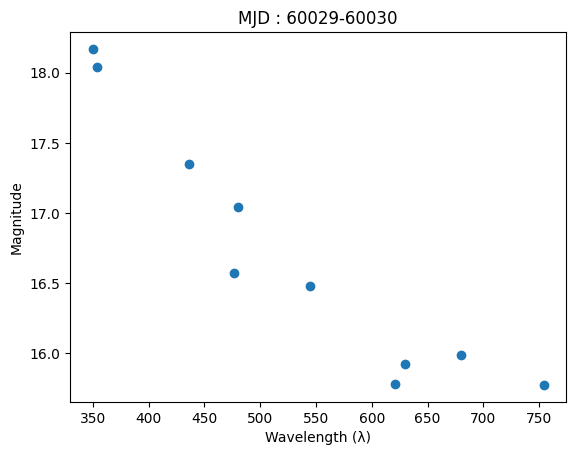

In [18]:
plt.scatter(wav, mag)
plt.xlabel('Wavelength (λ)')
plt.ylabel('Magnitude')
plt.title('MJD : 60029-60030')

(60028.0, 60031.0)

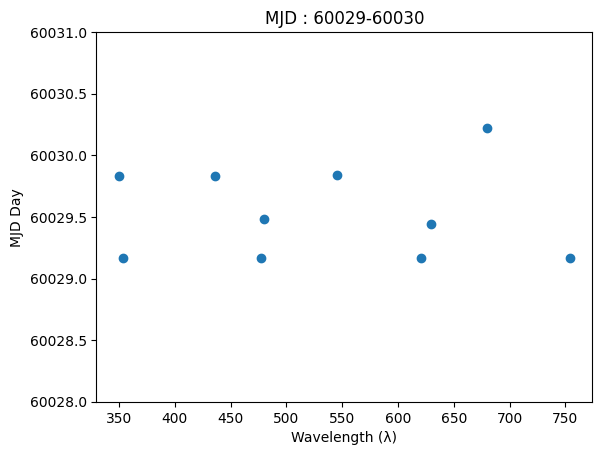

In [19]:
plt.scatter(wav, day)
plt.xlabel('Wavelength (λ)')
plt.ylabel('MJD Day')
plt.title('MJD : 60029-60030')
plt.ylim(60028, 60031)

Text(0.5, 1.0, 'MJD : 60029-60030')

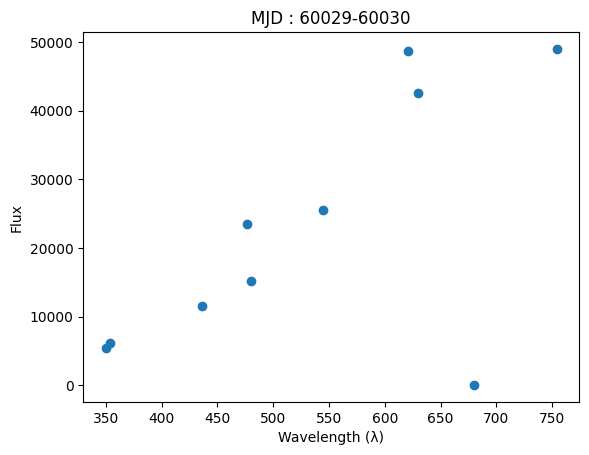

In [20]:
plt.scatter(wav, flux)
plt.xlabel('Wavelength (λ)')
plt.ylabel('Flux')
plt.title('MJD : 60029-60030')

In [21]:
file = pd.read_csv(r"C:\Users\anna_\Downloads\2023cj_data.snana.txt", sep='  ')

g = file[file['FLT'] == 'g']
r = file[file['FLT'] == 'r']
i = file[file['FLT'] == 'i']
z = file[file['FLT'] == 'z']
orange_ATLAS = file[file['FLT'] == 'orange-ATLAS']
cyan_ATLAS = file[file['FLT'] == 'cyan-ATLAS']
u = file[file['FLT'] == 'U']
b = file[file['FLT'] == 'B']
v = file[file['FLT'] == 'V']
w = file[file['FLT'] == 'w']
ip = file[file['FLT'] == 'ip']
up = file[file['FLT'] == 'up']
gp = file[file['FLT'] == 'gp']
rp = file[file['FLT'] == 'rp']
w1 = file[file['FLT'] == 'UVW1']
m2 = file[file['FLT'] == 'UVM2']
w2 = file[file['FLT'] == 'UVW2']

print(np.max(file['MJD']))

60402.618


C:\Users\anna_\AppData\Local\Temp\ipykernel_48956\735765800.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  file = pd.read_csv(r"C:\Users\anna_\Downloads\2023cj_data.snana.txt", sep='  ')


(-500.0, -150.0)

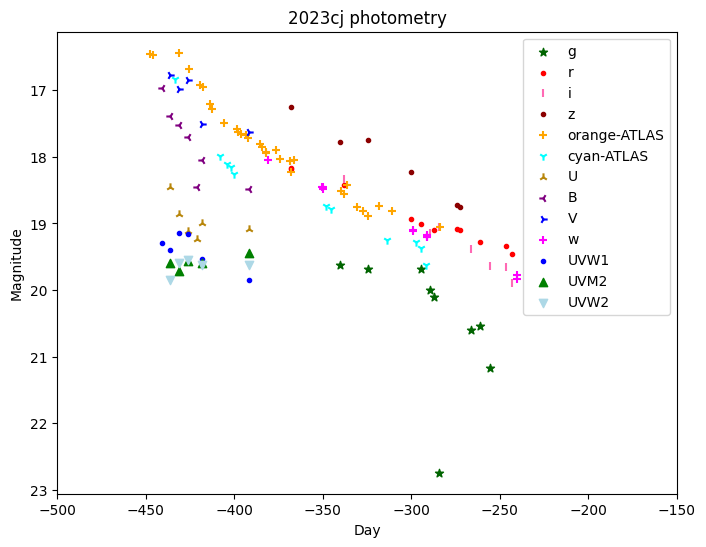

In [22]:
gday = g['MJD']-np.max(g['MJD'])
gmag = g['MAG']

rday = r['MJD']-np.max(g['MJD'])
rmag = r['MAG']

iday = i['MJD']-np.max(g['MJD'])
imag = i['MAG']

zday = z['MJD']-np.max(g['MJD'])
zmag = z['MAG']

orday = orange_ATLAS['MJD']-np.max(g['MJD'])
ormag = orange_ATLAS['MAG']

cyday = cyan_ATLAS['MJD']-np.max(g['MJD'])
cymag = cyan_ATLAS['MAG']

uday = u['MJD']-np.max(g['MJD'])
umag = u['MAG']

bday = b['MJD']-np.max(g['MJD'])
bmag = b['MAG']

vday = v['MJD']-np.max(g['MJD'])
vmag = v['MAG']

wday = w['MJD']-np.max(g['MJD'])
wmag = w['MAG']

w1day = w1['MJD']-np.max(g['MJD'])
w1mag = w1['MAG']

m2day = m2['MJD']-np.max(g['MJD'])
m2mag = m2['MAG']

w2day = w2['MJD']-np.max(g['MJD'])
w2mag = w2['MAG']

plt.figure(figsize=(8,6))
plt.scatter(gday, gmag, c='darkgreen', label='g', marker='*')
plt.scatter(rday, rmag, c='red', label='r', marker='.')
plt.scatter(iday, imag, c='hotpink', label='i', marker='|')
plt.scatter(zday, zmag, c='darkred', label='z', marker='.')
plt.scatter(orday, ormag, c='orange', label='orange-ATLAS', marker='+')
plt.scatter(cyday, cymag, c='cyan', label='cyan-ATLAS', marker='1')
plt.scatter(uday, umag, c='darkgoldenrod', label='U', marker='2')
plt.scatter(bday, bmag, c='purple', label='B', marker='3')
plt.scatter(vday, vmag, c='blue', label='V', marker='4')
plt.scatter(wday, wmag, c='magenta', label='w', marker='+')
plt.scatter(w1day, w1mag, c='blue', label='UVW1', marker='.')
plt.scatter(m2day, m2mag, c='green', label='UVM2', marker='^')
plt.scatter(w2day, w2mag, c='lightblue', label='UVW2', marker='v')

plt.gca().invert_yaxis()

plt.xlabel('Day')
plt.ylabel('Magnitude')
plt.title('2023cj photometry')
plt.legend()
plt.xlim(-500,-150)